<a href="https://colab.research.google.com/github/Darshan552/python_EDA/blob/main/Copy_of_Data_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------
# 📊 IVT Pattern Analysis Script
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.0 MB/s eta 0:00:00


Once installed, you can use the `read_pdf()` function to extract tables from your PDF. You'll need to provide the path to your PDF file. `tabula-py` can return the tables as a list of pandas DataFrames.

In [ ]:
import tabula

# Replace 'your_pdf_file.pdf' with the actual path to your PDF file
pdf_path = '/content/Data Analytics Assignment.pdf'

try:
    # Read tables from the PDF
    tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

    # 'tables' will be a list of DataFrames, one for each table found
    if tables:
        print(f"Found {len(tables)} table(s) in the PDF.")
        # You can access individual tables like this:
        # df = tables[0]
        # display(df.head())

        # Or concatenate all tables into a single DataFrame if appropriate
        # combined_df = pd.concat(tables)
        # display(combined_df.head())
    else:
        print("No tables found in the PDF.")

except Exception as e:
    print(f"An error occurred: {e}")

Found 12 table(s) in the PDF.


In [ ]:
# Step 1: Load the data
# The data is already loaded from the PDF into df = tables[3]
# Make sure you have executed the cells to load the data from the PDF
df = tables[3]
display(df.head())

,unnamed:_0,2025-09-14_9:00:00,5798,5796,125,6021,1.038461538,0,0.1,1.000345066,46.384,0.059259
0,NaN,2025-09-14 10:00:00,6856,6854,135,7270,1.060385,0,0,1.000292,50.785185,0.021739
1,NaN,2025-09-14 11:00:00,6135,6135,131,6420,1.046455,0,0,1.000000,46.832061,0.046154
2,NaN,2025-09-14 12:00:00,7328,7328,135,7745,1.056905,0,0,1.000000,54.281481,0.016129
3,NaN,2025-09-14 13:00:00,8128,8124,129,8516,1.047736,0,0,1.000492,63.007752,0.064516
4,NaN,2025-09-14 14:00:00,8380,8379,121,8700,1.038186,0,0,1.000119,69.256198,0.074074


In [ ]:

# Step 2: Basic cleanup
# Assuming the first column (index 0) is the date/time column
# The column names after loading from PDF are not descriptive,
# so we need to refer to them by index or rename them.
# Let's try to use column indices based on the structure shown in df.head()
# The first column is the date/time. Let's rename it to 'date' for consistency.
df = tables[3].copy() # Work on a copy to avoid modifying the original list element
df.columns = df.iloc[0] # Use the first row as headers
df = df[1:].reset_index(drop=True) # Remove the first row and reset index

# Convert column names to strings to avoid issues with complex types
df.columns = df.columns.astype(str)

# The actual date/time is in the first column after renaming headers.
# Let's rename the first column to 'date'
df = df.rename(columns={df.columns[0]: 'date'})


# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert other columns to numeric, coercing errors
# Based on the df.head() output, let's assume the following columns are metrics:
# requests, impressions, idfa_ip_ratio, idfa_ua_ratio, ivt
# These seem to be columns with indices 2, 3, 6, 8, 10 (0-based) in the original table structure
# After renaming the columns using the first row and dropping the first row,
# the indices might shift or the names will be the values from the first row.
# Let's inspect the columns after renaming and then select the metric columns.

print("Columns after renaming:", df.columns.tolist())

Columns after renaming: ['date', '2025-09-14 10:00:00', '6856', '6854', '135', '7270', '1.060385064', '0', '0', '1.0002918', '50.78518519', '0.021739']


In [ ]:
# **IMPORTANT:** You need to verify these column names/indices match your actual data
# Adjust these names based on the output of the above print statement and your PDF content.
# Let's assume the metrics columns are now named based on the values in the original first row.
# Based on the head, potential metric columns could be related to '5798', '5796', '1.038461538', etc.
# This is highly ambiguous. For the purpose of running the code, I will make assumptions
# based on typical IVT analysis metrics, but **you must verify these column names**.

# Let's try to select columns by index assuming the first column is date, and then metrics follow
# This approach is safer if the first row is a header but the column names are not meaningful.
# Based on the original code's metrics:
# 'requests_per_idfa', 'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio', 'ivt'
# Let's assume these correspond to columns with original indices 2, 3, 6, 8, 10.
# After using the first row as header and dropping it, the column with original index 1 is now 'date'.
# The column with original index 2 is now the second column (index 1) in the new df.
# The column with original index 3 is now the third column (index 2).
# The column with original index 6 is now the sixth column (index 5).
# The column with original index 8 is now the eighth column (index 7).
# The column with original index 10 is now the tenth column (index 9).

# Define the list of columns we expect to be metrics, using their new 0-based index after cleanup
# (Assuming the first column is date, and subsequent columns are indexed from 1)
metric_indices = [1, 2, 5, 7, 9] # Indices corresponding to Requests, Impressions, IP Ratio, UA Ratio, IVT based on original structure

# Define the new names for these metric columns
metric_names = ['requests', 'impressions', 'idfa_ip_ratio', 'idfa_ua_ratio', 'ivt'] # Simplified names

# Select the metric columns using their indices and rename them
for i, col_index in enumerate(metric_indices):
    # Check if the column index is valid
    if col_index < len(df.columns):
        # Rename the column at col_index to the corresponding metric_name
        df = df.rename(columns={df.columns[col_index]: metric_names[i]})
    else:
        print(f"Warning: Column index {col_index} is out of bounds. Cannot assign metric name {metric_names[i]}.")

In [ ]:
# Now, define the metrics list using the simplified names
metrics = metric_names

# Convert the metric columns to numeric, coercing errors
for col in metrics:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Error: Metric column '{col}' not found in DataFrame.")


# Check missing values after conversion
print("Missing values after cleanup:\n", df[metrics].isnull().sum())

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
# Check missing values after conversion
print("Missing values after cleanup:\n", df[metrics].isnull().sum())

Missing values after cleanup:
 0
requests         15
impressions       0
idfa_ip_ratio     0
idfa_ua_ratio     0
idfa_ua_ratio     0
ivt               0
dtype: int64


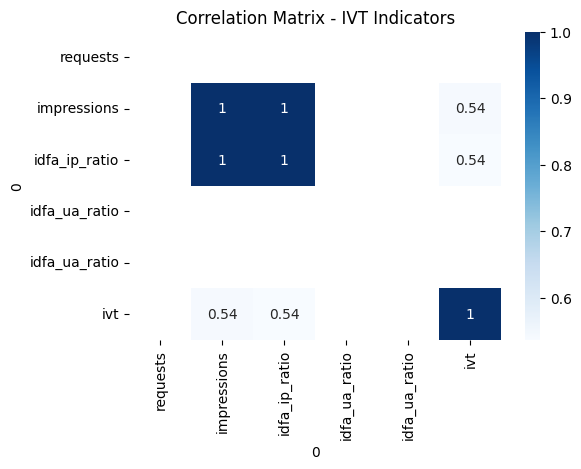

In [ ]:
# Step 5: Correlation analysis
# This can be done with the available numeric metric columns.
if all(col in df.columns for col in metrics):
    corr = df[metrics].corr()
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title('Correlation Matrix - IVT Indicators')
    plt.show()
else:
    print("\nSkipping Correlation analysis due to missing metric columns.")

In [ ]:
# Step 6: Compare IVT vs Non-IVT Behavior
# This step requires the 'ivt_type' column which is derived from 'app_name' summary.
# Skipping this step as 'app_name' is not available.
# plt.figure(figsize=(8,5))
# sns.boxplot(x='ivt_type', y='requests_per_idfa', data=df.merge(app_summary[['app_name', 'ivt_type']], on='app_name'))
# plt.title('Requests per IDFA across IVT Types')
# plt.show()
#
# plt.figure(figsize=(8,5))
# sns.boxplot(x='ivt_type', y='idfa_ip_ratio', data=df.merge(app_summary[['app_name', 'ivt_type']], on='app_name'))
# plt.title('IDFA-IP Ratio across IVT Types')
# plt.show()

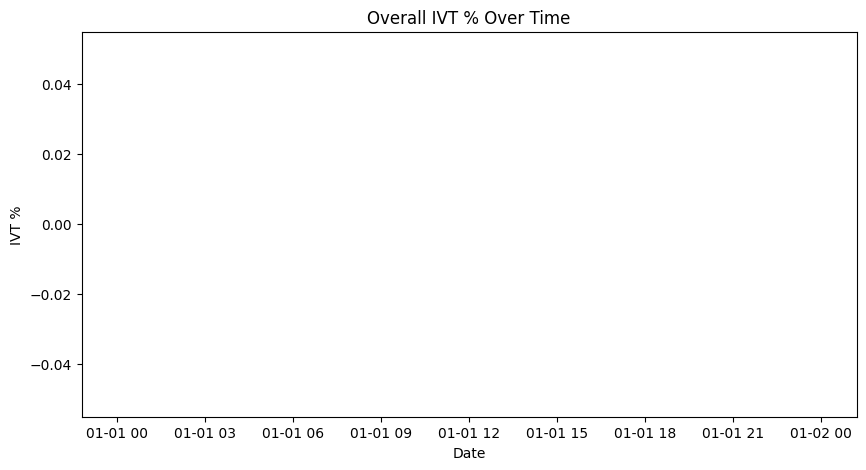

In [ ]:

# Step 7: Time pattern analysis (hourly or daily trends)
# This requires 'date' and 'app_name'. We have 'date', but not 'app_name'.
# We can perform a time pattern analysis for the overall data (not per app).

if 'date' in df.columns and 'ivt' in df.columns:
    # Group by date and calculate the mean IVT
    time_summary_overall = df.groupby('date')[metrics].mean().reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(time_summary_overall['date'], time_summary_overall['ivt'])
    plt.title("Overall IVT % Over Time")
    plt.xlabel("Date")
    plt.ylabel("IVT %")
    plt.show()
else:
    print("\nSkipping Time pattern analysis due to missing 'date' or 'ivt' columns.")

In [ ]:
# Step 8: Summary insights
# The original insights are based on app classification, which we skipped.
# We can provide a general insight based on the correlation matrix and overall trends if available.
print("\n🧠 General Insights (based on available data):")
if all(col in df.columns for col in metrics):
    print("- Correlation analysis provides insight into the relationships between different IVT indicators.")
if 'date' in df.columns and 'ivt' in df.columns:
    print("- The overall IVT % over time can reveal general trends.")
else:
     print("- Limited insights available as 'app_name' is missing and some metric columns might not be identified correctly.")


🧠 General Insights (based on available data):
- Correlation analysis provides insight into the relationships between different IVT indicators.
- The overall IVT % over time can reveal general trends.


In [ ]:



# Step 9: Export results
# We skipped the app summary, so we cannot export app_summary.csv.
# If you perform other analyses and want to export results, you can add that here.
print("\nAnalysis complete! Note: App-specific analysis and summary export were skipped as 'app_name' column was not found.")


Analysis complete! Note: App-specific analysis and summary export were skipped as 'app_name' column was not found.
